In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [2]:
# Load the data
data = pd.read_csv(r"F:\Climate Paper\Data\My Research Data.csv")  # Replace with your actual file
data.head()

,year,Bhutan,Bangladesh,India,Nepal,Pakistan
0,1850,0.23,6.34,83.03,1.14,-0.03
1,1851,0.21,5.41,64.25,1.04,-0.05
2,1852,0.37,5.27,54.26,1.00,-0.07
3,1853,0.28,5.06,48.19,0.97,-0.10
4,1854,0.27,5.25,43.87,0.95,-0.11


In [3]:
# Load your dataset (replace 'your_data.csv' with your actual file path)
data = pd.DataFrame({
    'year': np.arange(2000, 2021),
    'Bhutan': np.random.rand(21) * 0.1,
    'Bangladesh': np.random.rand(21) * 0.5,
    'India': np.random.rand(21) * 2.5,
    'Nepal': np.random.rand(21) * 0.2,
    'Pakistan': np.random.rand(21) * 1.0
})
data.set_index('year', inplace=True)

In [4]:
# Normalize the data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# Prepare data for LSTM

def create_sequences(data, sequence_length=5):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i+sequence_length])
        y.append(data[i+sequence_length])
    return np.array(X), np.array(y)

sequence_length = 5
X, y = create_sequences(data_scaled, sequence_length)

In [5]:
# Split into training and testing sets
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build the LSTM model
model = Sequential([
    LSTM(100, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    LSTM(100, activation='relu'),
    Dropout(0.2),
    Dense(y_train.shape[1])
])

model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test))

Epoch 1/50


C:\Miniconda3\envs\jupyter-nb\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 0.2793 - val_loss: 0.4157
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 0.2743 - val_loss: 0.4074
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step - loss: 0.2690 - val_loss: 0.3986
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.2637 - val_loss: 0.3891
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.2573 - val_loss: 0.3790
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.2511 - val_loss: 0.3680
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.2408 - val_loss: 0.3560
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 0.2375 - val_loss: 0.3427
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.2290 - val_loss: 0.3277
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.2177 - val_loss: 0.3109
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.2096 - val_loss: 0.2923
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 0.1980 - val_loss: 0.2718
Epoch 13/50
1

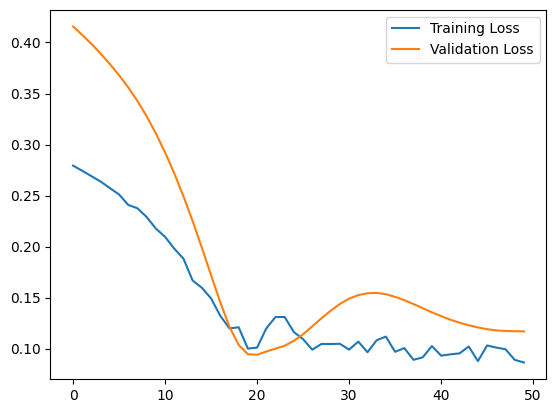

In [6]:
# Plot training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


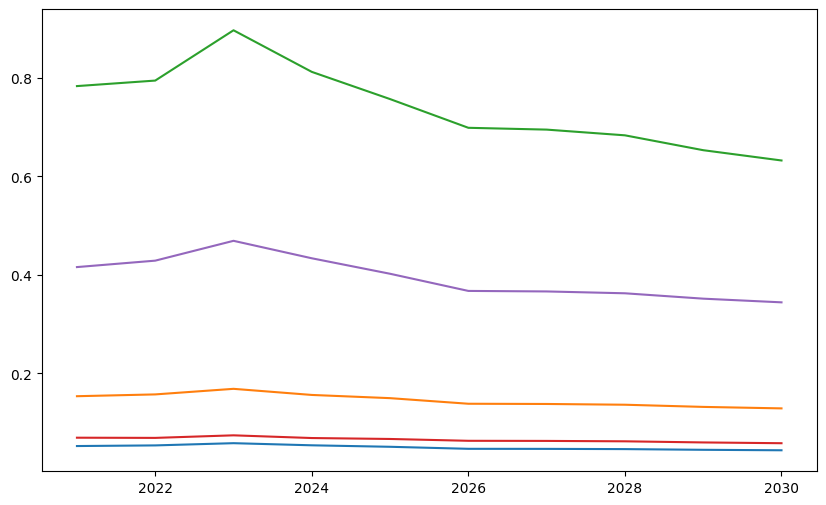

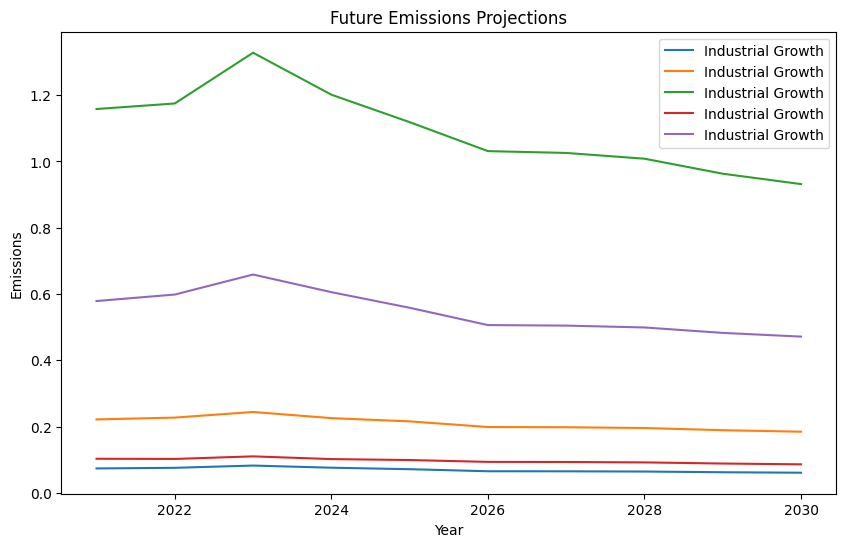

In [11]:
# Make future projections
def simulate_future_scenarios(model, initial_sequence, num_steps, scale_factor):
    future_projection = []
    current_sequence = initial_sequence

    for _ in range(num_steps):
        predicted = model.predict(current_sequence[np.newaxis, :, :])[0]
        future_projection.append(predicted * scale_factor)
        current_sequence = np.vstack((current_sequence[1:], predicted))

    return np.array(future_projection)

# Simulate different scenarios
scenarios = {
    "Policy Intervention": 0.8,  # 20% reduction
    "Industrial Growth": 1.2,   # 20% increase
}

initial_sequence = X_test[-1]  # Use the last test sequence as a starting point
future_steps = 10  # Predict the next 10 years

for scenario, factor in scenarios.items():
    future_emissions = simulate_future_scenarios(model, initial_sequence, future_steps, factor)
    future_emissions_unscaled = scaler.inverse_transform(future_emissions)

 # Plot results
    years = np.arange(2021, 2021 + future_steps)
    plt.figure(figsize=(10, 6))
    plt.plot(years, future_emissions_unscaled, label=scenario)

plt.title("Future Emissions Projections")
plt.xlabel("Year")
plt.ylabel("Emissions")
plt.legend()
plt.show()

In [12]:
# Recommendations
def generate_recommendations():
    print("Recommendations:\n")
    print("1. Policy Actions:")
    print("   - Implement carbon pricing mechanisms such as carbon taxes or cap-and-trade systems.")
    print("   - Strengthen renewable energy incentives to promote the adoption of solar, wind, and hydroelectric power.")
    print("   - Enforce strict regulations on high-emission industries to reduce pollutants.")

    print("\n2. Industry Recommendations:")
    print("   - Encourage industries to adopt cleaner technologies and energy-efficient processes.")
    print("   - Promote circular economy practices, including waste reduction and resource recycling.")
    print("   - Partner with research institutions to innovate low-carbon production methods.")

    print("\n3. Stakeholder Actions:")
    print("   - Educate the public about sustainable practices and their role in reducing emissions.")
    print("   - Collaborate with international bodies to meet global climate targets.")
    print("   - Support grassroots initiatives and community-level projects to enhance local sustainability.")

# Generate recommendations
generate_recommendations()

Recommendations:

1. Policy Actions:
   - Implement carbon pricing mechanisms such as carbon taxes or cap-and-trade systems.
   - Strengthen renewable energy incentives to promote the adoption of solar, wind, and hydroelectric power.
   - Enforce strict regulations on high-emission industries to reduce pollutants.

2. Industry Recommendations:
   - Encourage industries to adopt cleaner technologies and energy-efficient processes.
   - Promote circular economy practices, including waste reduction and resource recycling.
   - Partner with research institutions to innovate low-carbon production methods.

3. Stakeholder Actions:
   - Educate the public about sustainable practices and their role in reducing emissions.
   - Collaborate with international bodies to meet global climate targets.
   - Support grassroots initiatives and community-level projects to enhance local sustainability.
